In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [7]:
df['sex'].nunique()

2

In [8]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df['embark_town'].nunique()

3

In [11]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [12]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [69]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [13]:
df['age'].mean()

29.69911764705882

In [14]:
df['age'].median()

28.0

<Axes: xlabel='age', ylabel='Count'>

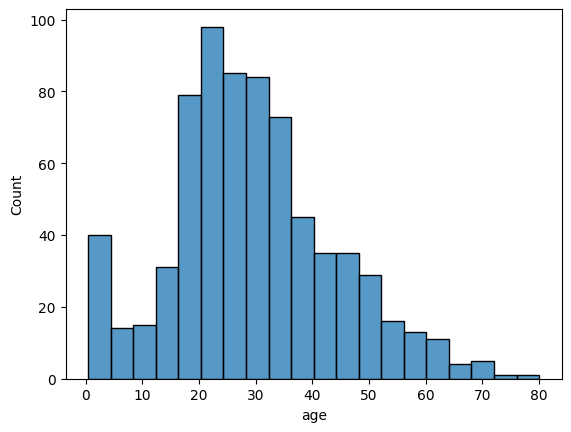

In [15]:
sns.histplot(df['age'])

In [16]:
df['age']= df['age'].fillna(df['age'].median())

In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
df['sex'].mode()[0]

'male'

In [19]:
df.shape[1]

15

In [20]:
# df['sex']= df['sex'].fillna(df['sex'].mode()[0])

In [21]:
df['deck']= df['deck'].fillna(df['deck'].mode()[0])

In [22]:
df['embark_town']= df['embark_town'].fillna(df['embark_town'].mode()[0])

In [23]:
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [26]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [44]:
X = df.drop(columns=['survived','age','fare'])
y=df['survived']

In [45]:
X

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,3,1,0,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
1,1,1,0,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,3,0,0,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,True
3,1,1,0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,True
4,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
887,1,0,0,False,True,False,False,True,False,False,...,True,True,False,False,False,False,False,False,True,True
888,3,1,2,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
889,1,0,0,True,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [47]:
X_train

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
661,3,0,0,True,True,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
393,1,1,0,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
266,3,4,1,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
144,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
446,2,0,1,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2,1,1,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,True,True
165,3,0,2,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
7,3,3,1,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
219,2,0,0,True,True,True,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [61]:
X_test

,pclass,sibsp,parch,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
246,3,0,0,False,True,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
588,3,0,0,True,True,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
472,2,1,2,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,True,True
71,3,5,2,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
654,3,0,0,False,True,False,True,False,False,True,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1,0,0,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
727,3,0,0,False,True,False,True,False,False,True,...,True,False,True,False,False,False,False,True,False,True
599,1,1,0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
525,3,0,0,True,True,True,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False


In [49]:
y_train

661    0
393    1
266    0
144    0
446    1
      ..
440    1
165    1
7      0
219    0
326    0
Name: survived, Length: 712, dtype: int64

In [50]:
y_test

246    0
588    0
472    1
71     0
654    0
      ..
284    0
727    1
599    1
525    0
457    1
Name: survived, Length: 179, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model  = LogisticRegression()
model

LogisticRegression()

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [55]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
246,0,0
588,0,0
472,1,1
71,0,0
654,0,0
...,...,...
284,0,0
727,1,1
599,1,1
525,0,0


In [56]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [57]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  1.0


In [58]:
print('Precision: ', precision_score(y_test,y_pred))

Precision:  1.0


In [70]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[103   0]
 [  0  76]]


In [71]:
print('classification Report : \n', classification_report(y_test,y_pred))

classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        76

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [67]:
model.predict([[1, 0, 3, True, False, True,
       True, False, True, True, False, True,True, False, True, True, False, True,
       False, False,  False]])

C:\Users\Sajid\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)